In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
df=pd.read_csv('amazon_india_2021.csv')
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2021_00000001,2021-01-29,CUST_2021_00014071,PROD_000178,Xiaomi Mi 5 64GB Black,Electronics,Smartphones,Xiaomi,43292.78,22.96,33354.53,1,33354.53,NaN,33354.53,Mumbai,Maharashtra,Metro,Standard,18-25,UPI,1,Same Day,True,False,NaN,4.5,Delivered,1,2021,1,0.24,True,3.7
1,TXN_2021_00000002,2021-01-10,CUST_2019_00006495,PROD_000610,Vivo V15 Pro 256GB White,Electronics,Smartphones,Vivo,32964.72,16.68,27465.37,1,27465.37,0.0,27465.37,Jaipur,Rajasthan,Tier1,Budget,26-35,UPI,5,Standard,False,False,NaN,5.0,Delivered,1,2021,1,0.19,True,4.1
2,TXN_2021_00000003,2021-01-18,CUST_2018_00029239,PROD_000404,Xiaomi Poco F1 128GB Gold,Electronics,Smartphones,Xiaomi,45794.75,0.00,45794.75,2,91589.50,0.0,91589.50,Jaipur,Rajasthan,Tier1,Standard,26-35,COD,5,Standard,False,False,NaN,NaN,Delivered,1,2021,1,0.22,True,4.4
3,TXN_2021_00000004,2021-01-08,CUST_2021_00040991,PROD_000664,Apple iPhone SE (2nd gen) 64GB Gold,Electronics,Smartphones,Apple,136337.08,0.00,136337.08,1,136337.08,0.0,136337.08,Mumbai,Maharashtra,Metro,Premium,26-35,UPI,2,Express,True,False,NaN,4.0,Delivered,1,2021,1,0.17,True,3.8
4,TXN_2021_00000005,2021-01-02,CUST_2016_00006478,PROD_000466,Oppo A3s 64GB Black,Electronics,Smartphones,Oppo,19992.12,0.00,19992.12,1,19992.12,0.0,19992.12,Bareilly,Uttar Pradesh,Rural,Budget,46-55,UPI,4,Standard,False,False,NaN,3.0,Delivered,1,2021,1,0.24,1,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138182,TXN_2021_00135877_DUP,12/24/2021,CUST_2016_00000089,PROD_000402,Xiaomi Poco F1 128GB Blue,Electronics,Smartphones,Xiaomi,34242.15,23.22,26292.26,1,26292.26,0.0,26292.26,Mumbai,Maharashtra,Metro,Standard,26-35,Debit Card,5,Standard,False,False,NaN,5.0,Delivered,12,2021,4,0.19,False,3.4
138183,TXN_2021_00065427_DUP,2021-07-15,CUST_2017_00004814,PROD_001904,Xiaomi Tracker Premium,Electronics,Smart Watch,Xiaomi,"Rs 60,140",15.86,50599.75,1,50599.75,0.0,50599.75,Bangalore,Karnataka,Metro,Budget,NaN,Credit Card,3,Standard,False,True,Prime Day,NaN,Delivered,7,2021,3,0.06,False,4.1
138184,TXN_2021_00012199_DUP,2021-02-01,CUST_2021_00012902,PROD_000904,Realme Realme Narzo 30 64GB Blue,Electronics,Smartphones,Realme,46453.23,28.15,33378.18,3,100134.55,0.0,100134.55,Nagpur,Maharashtra,Tier1,Standard,26-35,UPI,1,Same Day,True,0,NaN,4.0,Delivered,2,2021,1,0.19,False,3.8
138185,TXN_2021_00118907_DUP,2021-11-16,CUST_2021_00016509,PROD_001558,Lenovo VivoBook 4GB RAM Black,Electronics,Laptops,Lenovo,51021.72,0.00,51021.72,1,51021.72,0.0,51021.72,Indore,Madhya Pradesh,Tier1,Standard,26-35,Debit Card,1,Same Day,True,False,NaN,3.0,Delivered,11,2021,4,2.76,True,4.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138187 entries, 0 to 138186
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          138187 non-null  object 
 1   order_date              138187 non-null  object 
 2   customer_id             138187 non-null  object 
 3   product_id              138187 non-null  object 
 4   product_name            138187 non-null  object 
 5   category                138187 non-null  object 
 6   subcategory             138187 non-null  object 
 7   brand                   138187 non-null  object 
 8   original_price_inr      138187 non-null  object 
 9   discount_percent        138187 non-null  float64
 10  discounted_price_inr    138187 non-null  float64
 11  quantity                138187 non-null  int64  
 12  subtotal_inr            138187 non-null  float64
 13  delivery_charges        127147 non-null  float64
 14  final_amount_inr    

#Question 1
Your dataset contains order_date in multiple formats: 'DD/MM/YYYY', 'DD-MM-YY', 'YYYY-MM-DD', and some invalid entries like '32/13/2020'. Clean and standardize all dates to 'YYYY-MM-DD' format, handling invalid dates appropriately.


In [3]:
df['order_date']=df['order_date'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
df['order_date']

,order_date
0,2021-01-29
1,2021-01-10
2,2021-01-18
3,2021-01-08
4,2021-01-02
...,...
138182,12/24/2021
138183,2021-07-15
138184,2021-02-01
138185,2021-11-16


In [4]:
df['order_date'].isnull().sum()

np.int64(0)

In [5]:
mask = df['order_date'].str.match(r'^\d{4}-\d{2}-\d{2}$')

df.loc[mask,'order_date']=pd.to_datetime(df.loc[mask, 'order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2021-01-29 00:00:00
1,2021-01-10 00:00:00
2,2021-01-18 00:00:00
3,2021-01-08 00:00:00
4,2021-01-02 00:00:00
...,...
138182,12/24/2021
138183,2021-07-15 00:00:00
138184,2021-02-01 00:00:00
138185,2021-11-16 00:00:00


In [6]:
df['order_date']=pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2021-01-29
1,2021-01-10
2,2021-01-18
3,2021-01-08
4,2021-01-02
...,...
138182,NaT
138183,2021-07-15
138184,2021-02-01
138185,2021-11-16


#Question 2
The original_price_inr column contains mixed data types: numeric values, text with '₹' symbols, comma separators ('₹1,25,000'), and some entries like 'Price on Request'. Clean this column to contain only numeric values in Indian Rupees.


In [7]:
df['original_price_inr']=df['original_price_inr'].str.replace(r'[^\d.]','',regex=True)
df['original_price_inr']=df['original_price_inr'].astype('float')
df['original_price_inr']

,original_price_inr
0,43292.78
1,32964.72
2,45794.75
3,136337.08
4,19992.12
...,...
138182,34242.15
138183,60140.00
138184,46453.23
138185,51021.72


In [8]:
df['original_price_inr'].isnull().sum()

np.int64(0)

#Question 3
Customer ratings appear in various formats: '5.0', '4 stars', '3/5', '2.5/5.0', and some missing values. Standardize all ratings to numeric scale 1.0-5.0, handling inconsistent formats and missing values strategically.


In [9]:
df['customer_rating'].unique()

array(['4.5', '5.0', nan, '4.0', '3.0', '3.5', '4.0 stars', '5.0/5.0',
       '5/5', '4/5', '4.5 stars', '3/5', '3.5 stars', '5.0 stars', '4',
       '3', '4.0/5.0', '4.5/5.0', '3.0/5.0', '3.0 stars', '3.5/5.0', '5'],
      dtype=object)

In [10]:
df['customer_rating']=df['customer_rating'].str.replace(r'[\/ ].*','',case=False,regex=True).str.strip()

In [11]:
df['customer_rating'].isnull().sum()

np.int64(41885)

In [12]:
df['customer_rating']=df['customer_rating'].replace('',np.nan)

In [13]:
df['customer_rating']=df['customer_rating'].astype(float)

In [14]:
df['customer_rating']

,customer_rating
0,4.5
1,5.0
2,NaN
3,4.0
4,3.0
...,...
138182,5.0
138183,NaN
138184,4.0
138185,3.0


In [15]:
df['customer_rating'].isnull().sum()

np.int64(41885)

In [16]:
df['customer_rating'].mean()
# df['customer_rating'].median()
# df['customer_rating'].mode()

np.float64(4.309453593902515)

In [17]:
df['customer_rating']=df['customer_rating'].fillna(df['customer_rating'].mean())

In [18]:
df['customer_rating'].isnull().sum()

np.int64(0)

#Question 4
The customer_city column has inconsistent naming: 'Bangalore/Bengaluru', 'Mumbai/Bombay', 'Delhi/New Delhi', along with spelling errors and case variations. Standardize all city names and handle geographical variations.


In [19]:
df['customer_city'].unique()

array(['Mumbai', 'Jaipur', 'Bareilly', 'Surat', 'Vadodara', 'Kolkata',
       'Bangalore', 'Saharanpur', 'Coimbatore', 'Kanpur', 'Chennai',
       'Pune', 'Lucknow', 'Indore', 'Delhi', 'Ahmedabad', 'Kochi',
       'Allahabad', 'Chandigarh', 'Bhubaneswar', 'Visakhapatnam',
       'Ludhiana', 'Nagpur', 'Patna', 'Hyderabad', 'Aligarh', 'Varanasi',
       'Meerut', 'Madras', 'Gorakhpur', 'Calcutta', 'Moradabad', 'mumba',
       'Bombay', 'DELHI', 'chenai', 'BANGALORE', 'Mumbai ', 'Chennai ',
       'Bengaluru', 'Banglore', 'kolkata', 'Bengalore', 'KOLKATA',
       'Delhi NCR', 'delhi', 'Kolkata ', 'New Delhi', 'MUMBAI', 'CHENNAI'],
      dtype=object)

In [20]:
!pip install fuzzywuzzy

In [21]:
from fuzzywuzzy import process  # pip install thefuzz

def clean_city_names(df, column):

    manual_mapping = {
        # Mumbai
        'bombay': 'Mumbai',
        'mumba': 'Mumbai',
        'mumbai ': 'Mumbai',
        'mumabi': 'Mumbai',

        # Bengaluru
        'bangalore': 'Bengaluru',
        'banglore': 'Bengaluru',
        'bengalore': 'Bengaluru',

        # Delhi
        'new delhi': 'Delhi',
        'delhi ncr': 'Delhi',
        'delhi ': 'Delhi',

        # Chennai
        'madras': 'Chennai',
        'chenai': 'Chennai',
        'chennai ': 'Chennai',

        # Kolkata
        'calcutta': 'Kolkata',
        'kolkata ': 'Kolkata',
        'kolkata': 'Kolkata',  # lowercase variant
        'kolkatta': 'Kolkata',
    }

    master_list= [
        'Pune', 'Chandigarh', 'Ludhiana', 'Bengaluru', 'Kochi', 'Mumbai',
        'Kanpur', 'Patna', 'Bhubaneswar', 'Delhi', 'Nagpur', 'Indore',
        'Ahmedabad', 'Chennai', 'Kolkata', 'Gorakhpur', 'Visakhapatnam',
        'Hyderabad', 'Lucknow', 'Varanasi', 'Moradabad', 'Jaipur', 'Surat',
        'Coimbatore', 'Vadodara', 'Meerut', 'Aligarh', 'Bareilly', 'Saharanpur',
        'Allahabad'
    ]
    master_list_lower = [c.lower() for c in master_list]


    df[column] = df[column].astype(str).str.lower().str.strip()
    df[column] = df[column].replace({"nan": pd.NA})

    df[column] = df[column].replace(manual_mapping)

    def match_city(city):
        if pd.isna(city):
            return city
        best_match, score = process.extractOne(city, master_list_lower)
        return best_match if score > 85 else city

    df[column] = df[column].apply(match_city)


    df[column] = df[column].apply(lambda x: x.title() if pd.notna(x) else x)

    return df[column]


/usr/local/lib/python3.12/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [22]:
# Get unique city names
unique_cities = df['customer_city'].unique()

# Apply the cleaning function to unique city names
cleaned_unique_cities = [clean_city_names(pd.DataFrame({'city': [city]}), 'city').iloc[0] for city in unique_cities]

# Create a mapping dictionary
city_mapping = dict(zip(unique_cities, cleaned_unique_cities))

# Map the cleaned names back to the original column
df['customer_city'] = df['customer_city'].map(city_mapping)

display(df['customer_city'].unique())

array(['Mumbai', 'Jaipur', 'Bareilly', 'Surat', 'Vadodara', 'Kolkata',
       'Bengaluru', 'Saharanpur', 'Coimbatore', 'Kanpur', 'Chennai',
       'Pune', 'Lucknow', 'Indore', 'Delhi', 'Ahmedabad', 'Kochi',
       'Allahabad', 'Chandigarh', 'Bhubaneswar', 'Visakhapatnam',
       'Ludhiana', 'Nagpur', 'Patna', 'Hyderabad', 'Aligarh', 'Varanasi',
       'Meerut', 'Gorakhpur', 'Moradabad'], dtype=object)

In [23]:
df['customer_city'].unique()

array(['Mumbai', 'Jaipur', 'Bareilly', 'Surat', 'Vadodara', 'Kolkata',
       'Bengaluru', 'Saharanpur', 'Coimbatore', 'Kanpur', 'Chennai',
       'Pune', 'Lucknow', 'Indore', 'Delhi', 'Ahmedabad', 'Kochi',
       'Allahabad', 'Chandigarh', 'Bhubaneswar', 'Visakhapatnam',
       'Ludhiana', 'Nagpur', 'Patna', 'Hyderabad', 'Aligarh', 'Varanasi',
       'Meerut', 'Gorakhpur', 'Moradabad'], dtype=object)

#Question 5
Boolean columns (is_prime_member, is_prime_eligible, is_festival_sale) contain mixed values: True/False, Yes/No, 1/0, Y/N, and some missing entries. Convert all boolean columns to consistent True/False format.


In [24]:
df['is_prime_member'].unique()

array(['True', 'False', '1', 'Yes', 'No', 'FALSE', '0', 'TRUE'],
      dtype=object)

In [25]:
df['is_prime_eligible'].unique()

array(['True', '1', 'Yes', 'False', '0', 'No', 'TRUE', 'FALSE'],
      dtype=object)

In [26]:
df['is_festival_sale'].unique()

array(['False', 'True', 'No', '0', 'Yes', 'FALSE', 'TRUE', '1'],
      dtype=object)

In [27]:
import pandas as pd

def make_true_false(x):

    if pd.isna(x):
        return pd.NA

    x = str(x).strip().upper()

    if x in ['NAN', 'NONE', 'NULL', '']:
        return pd.NA

    if x in ['NO', 'FALSE', '0']:
        return False
    elif x in ['YES', 'TRUE', '1']:
        return True

    return pd.NA


In [28]:
df['is_festival_sale']=df['is_festival_sale'].apply(make_true_false)
df['is_prime_eligible']=df['is_prime_eligible'].apply(make_true_false)
df['is_prime_member']=df['is_prime_member'].apply(make_true_false)

In [29]:
print(df['is_festival_sale'].unique())
print(df['is_prime_eligible'].unique())
print(df['is_prime_member'].unique())

[False  True]
[ True False]
[ True False]


#Question 6
Product categories have variations: 'Electronics/Electronic/ELECTRONICS/Electronics & Accessories'. Standardize category names across the dataset and ensure consistent naming conventions.


In [30]:
df['category'].unique()

array(['Electronics', 'Electronicss', 'Electronic',
       'Electronics & Accessories', 'ELECTRONICS'], dtype=object)

In [31]:
mapping_cat = {
    'electronics': 'Electronics',
    'electronic': 'Electronics',
    # 'Electronics & Accessories': 'Electronics',
    'ELECTRONICS':'Electronics',
    'Electronic':'Electronics',
    'Electronicss':'Electronics'

}

In [32]:
df['category']=df['category'].replace(mapping_cat)

In [33]:
df['category'].unique()

array(['Electronics', 'Electronics & Accessories'], dtype=object)

#Question 7
The delivery_days column contains negative values, text entries like 'Same Day', '1-2 days', and some unrealistic values like 50 days. Clean this column to contain only valid numeric delivery days.


In [34]:
df['delivery_days'].unique()

array(['1', '5', '2', '4', '3', '6', '1-2 days', '7', 'Same Day', '-1',
       '0', 'Express', '15'], dtype=object)

In [35]:
df.loc[df['delivery_days'].str.contains(r'[1-2|same day]',case=False,na=False),'delivery_days'].sample(10)

,delivery_days
64675,-1
36153,1
80167,1
48895,1
42079,2
104397,1
17817,1
27913,1
1983,1
81482,1


In [36]:
df['delivery_days']=df['delivery_days'].str.replace('1-2','2',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Same Day','1',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Express','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('-','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('2 days','2',case=False)

In [37]:
df['delivery_days'] = df['delivery_days'].replace('', np.nan)
df['delivery_days'] = pd.to_numeric(df['delivery_days'], errors='coerce')
display(df['delivery_days'].unique())

array([ 1.,  5.,  2.,  4.,  3.,  6.,  7.,  0., nan, 15.])

In [38]:
df['delivery_days'].isnull().sum()

np.int64(264)

In [39]:
df['delivery_days'] = df['delivery_days'].fillna(df['delivery_days'].mean()).astype(int)

In [40]:
df['delivery_days'].isnull().sum()


np.int64(0)

In [41]:
df['delivery_days'].head()

,delivery_days
0,1
1,5
2,5
3,2
4,4


#Question 8
Identify and handle duplicate transactions where the same customer, product, date, and amount appear multiple times. Some duplicates are genuine (bulk orders) while others are data errors. Develop a strategy to distinguish and handle both cases.


In [42]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
251,TXN_2021_00000252,2021-01-31,CUST_2017_00014282,PROD_000487,Apple iPhone 11 256GB Blue,Electronics,Smartphones,Apple,187545.53,20.11,149838.31,2,299676.62,0.0,299676.62,Patna,Bihar,Tier2,Premium,36-45,UPI,4,Standard,False,False,NaN,5.000000,Delivered,1,2021,1,0.21,False,3.5
318,TXN_2021_00000319,2021-01-24,CUST_2021_00000027,PROD_000148,Samsung Galaxy J7 Prime 32GB Black,Electronics,Smartphones,Samsung,29539.19,69.84,8909.33,1,8909.33,0.0,8909.33,Vadodara,Gujarat,Tier2,Standard,NaN,UPI,2,Express,True,True,Republic Day Sale,4.309454,Delivered,1,2021,1,0.19,True,3.2
1519,TXN_2021_00001520,2021-01-07,CUST_2021_00006407,PROD_001891,Samsung Tracker,Electronics,Smart Watch,Samsung,77317.96,0.00,77317.96,1,77317.96,0.0,77317.96,Kolkata,West Bengal,Metro,Premium,26-35,COD,1,Same Day,True,False,NaN,4.500000,Delivered,1,2021,1,0.04,False,4.4
1651,TXN_2021_00001652,2021-01-03,CUST_2017_00011764,PROD_000579,Realme Realme 3 128GB Black,Electronics,Smartphones,Realme,32907.49,0.00,32907.49,1,32907.49,0.0,32907.49,Ahmedabad,Gujarat,Tier1,Standard,26-35,Credit Card,5,Standard,False,False,NaN,5.000000,Delivered,1,2021,1,0.21,False,4.5
1835,TXN_2021_00001836,2021-01-10,CUST_2021_00030116,PROD_000263,OnePlus OnePlus 5 32GB Black,Electronics,Smartphones,OnePlus,113292.56,0.00,113292.56,2,226585.12,0.0,226585.12,Pune,Maharashtra,Tier1,Standard,18-25,UPI,1,Same Day,True,False,NaN,4.309454,Delivered,1,2021,1,0.25,False,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138182,TXN_2021_00135877_DUP,NaT,CUST_2016_00000089,PROD_000402,Xiaomi Poco F1 128GB Blue,Electronics,Smartphones,Xiaomi,34242.15,23.22,26292.26,1,26292.26,0.0,26292.26,Mumbai,Maharashtra,Metro,Standard,26-35,Debit Card,5,Standard,False,False,NaN,5.000000,Delivered,12,2021,4,0.19,False,3.4
138183,TXN_2021_00065427_DUP,2021-07-15,CUST_2017_00004814,PROD_001904,Xiaomi Tracker Premium,Electronics,Smart Watch,Xiaomi,60140.00,15.86,50599.75,1,50599.75,0.0,50599.75,Bengaluru,Karnataka,Metro,Budget,NaN,Credit Card,3,Standard,False,True,Prime Day,4.309454,Delivered,7,2021,3,0.06,False,4.1
138184,TXN_2021_00012199_DUP,2021-02-01,CUST_2021_00012902,PROD_000904,Realme Realme Narzo 30 64GB Blue,Electronics,Smartphones,Realme,46453.23,28.15,33378.18,3,100134.55,0.0,100134.55,Nagpur,Maharashtra,Tier1,Standard,26-35,UPI,1,Same Day,True,False,NaN,4.000000,Delivered,2,2021,1,0.19,False,3.8
138185,TXN_2021_00118907_DUP,2021-11-16,CUST_2021_00016509,PROD_001558,Lenovo VivoBook 4GB RAM Black,Electronics,Laptops,Lenovo,51021.72,0.00,51021.72,1,51021.72,0.0,51021.72,Indore,Madhya Pradesh,Tier1,Standard,26-35,Debit Card,1,Same Day,True,False,NaN,3.000000,Delivered,11,2021,4,2.76,True,4.0


In [43]:
df=df.drop_duplicates(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'],keep='first')

In [44]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating


#Question 9
The dataset contains outlier prices where some products show prices 100x higher than expected due to data entry errors (decimal point issues). Identify and correct these outliers using statistical methods and domain knowledge.


In [45]:
df.loc[:,['product_name','original_price_inr']]

,product_name,original_price_inr
0,Xiaomi Mi 5 64GB Black,43292.78
1,Vivo V15 Pro 256GB White,32964.72
2,Xiaomi Poco F1 128GB Gold,45794.75
3,Apple iPhone SE (2nd gen) 64GB Gold,136337.08
4,Oppo A3s 64GB Black,19992.12
...,...,...
137495,Vivo V7+ 16GB Black,27282.64
137496,Vivo X60 64GB Gold,50378.10
137497,Oppo A52 64GB Black,45649.79
137498,Realme Realme X50 Pro 64GB Blue,20352.21


In [46]:
df['original_price_inr']

,original_price_inr
0,43292.78
1,32964.72
2,45794.75
3,136337.08
4,19992.12
...,...
137495,27282.64
137496,50378.10
137497,45649.79
137498,20352.21


<Axes: >

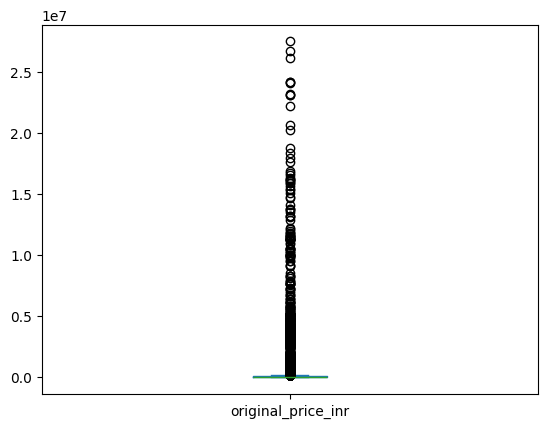

In [47]:
df['original_price_inr'].plot(kind='box')

In [48]:
df['original_price_inr'].describe()

,original_price_inr
count,1.374990e+05
mean,9.446943e+04
std,4.182608e+05
min,1.284980e+03
25%,3.464258e+04
50%,5.111063e+04
75%,1.097155e+05
max,2.751160e+07


In [49]:
Q1=df['original_price_inr'].quantile(0.25)
Q3=df['original_price_inr'].quantile(0.75)
Q3,Q1

(np.float64(109715.53), np.float64(34642.58))

In [50]:
IQR=Q3-Q1
IQR

np.float64(75072.95)

In [51]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [52]:
lower_limit,upper_limit

(np.float64(-77966.84499999999), np.float64(222324.955))

In [53]:
df[((df['original_price_inr'] < lower_limit) | (df['original_price_inr'] > upper_limit))]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
47,TXN_2021_00000048,2021-01-13,CUST_2021_00017956,PROD_000015,Apple iPhone 6 Plus 16GB Blue,Electronics,Smartphones,Apple,244300.62,0.00,244300.62,3,732901.86,NaN,732901.86,Chennai,Tamil Nadu,Metro,Premium,18-25,COD,1,Same Day,True,False,NaN,5.000000,Delivered,1,2021,1,0.20,False,4.1
51,TXN_2021_00000052,2021-01-18,CUST_2018_00034798,PROD_001985,Samsung OLED TV Deluxe,Electronics,TV & Entertainment,Samsung,293616.38,0.00,293616.38,1,293616.38,0.0,293616.38,Visakhapatnam,Andhra Pradesh,Tier2,Premium,18-25,UPI,6,Standard,False,False,NaN,4.309454,Delivered,1,2021,1,13.83,True,4.1
71,TXN_2021_00000072,2021-01-07,CUST_2021_00029679,PROD_001587,ASUS Ultrabook 8GB RAM Black,Electronics,Laptops,ASUS,263246.14,16.82,218962.78,1,218962.78,0.0,218962.78,Bengaluru,Karnataka,Metro,Premium,18-25,COD,1,Same Day,True,False,NaN,5.000000,Delivered,1,2021,1,2.24,True,3.7
78,TXN_2021_00000079,2021-01-19,CUST_2021_00033316,PROD_000808,Apple iPhone 13 Pro Max 256GB Black,Electronics,Smartphones,Apple,328886.18,0.00,328886.18,1,328886.18,0.0,328886.18,Chennai,Tamil Nadu,Metro,Premium,26-35,Credit Card,2,Express,True,False,NaN,5.000000,Delivered,1,2021,1,0.21,True,3.7
153,TXN_2021_00000154,2021-01-12,CUST_2019_00035573,PROD_000655,Apple iPhone 12 Pro Max 128GB Blue,Electronics,Smartphones,Apple,229562.05,22.58,177735.63,2,355471.27,0.0,355471.27,Delhi,Delhi,Metro,Premium,26-35,UPI,4,Standard,False,False,NaN,3.500000,Delivered,1,2021,1,0.17,True,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137273,TXN_2021_00137274,2021-12-06,CUST_2021_00011589,PROD_000798,Apple iPhone 13 128GB White,Electronics,Smartphones,Apple,280545.43,20.47,223104.64,1,223104.64,0.0,223104.64,Mumbai,Maharashtra,Metro,Premium,26-35,UPI,1,Same Day,True,False,NaN,4.309454,Delivered,12,2021,4,0.21,True,4.1
137277,TXN_2021_00137278,2021-12-10,CUST_2019_00018573,PROD_000797,Apple iPhone 13 64GB White,Electronics,Smartphones,Apple,327892.75,5.55,309685.18,1,309685.18,0.0,309685.18,Mumbai,Maharashtra,Metro,Premium,18-25,Net Banking,6,Standard,False,False,NaN,5.000000,Delivered,12,2021,4,0.21,True,4.5
137287,TXN_2021_00137288,2021-12-03,CUST_2019_00038513,PROD_000494,Apple iPhone 11 Pro 64GB Blue,Electronics,Smartphones,Apple,276889.09,0.00,276889.09,1,276889.09,0.0,276889.09,Bengaluru,Karnataka,Metro,Premium,NaN,UPI,4,Standard,False,False,NaN,4.500000,Delivered,12,2021,4,0.25,True,4.2
137300,TXN_2021_00137301,2021-12-01,CUST_2021_00008220,PROD_000796,Apple iPhone 13 128GB Black,Electronics,Smartphones,Apple,341474.90,0.00,341474.90,3,1024424.70,0.0,1024424.70,Nagpur,Maharashtra,Tier1,Premium,36-45,UPI,2,Express,True,False,NaN,3.500000,Delivered,12,2021,4,0.22,True,4.2


In [54]:
df=df[(df['original_price_inr']>=lower_limit)&(df['original_price_inr']<=upper_limit)]

In [55]:
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2021_00000001,2021-01-29,CUST_2021_00014071,PROD_000178,Xiaomi Mi 5 64GB Black,Electronics,Smartphones,Xiaomi,43292.78,22.96,33354.53,1,33354.53,NaN,33354.53,Mumbai,Maharashtra,Metro,Standard,18-25,UPI,1,Same Day,True,False,NaN,4.500000,Delivered,1,2021,1,0.24,True,3.7
1,TXN_2021_00000002,2021-01-10,CUST_2019_00006495,PROD_000610,Vivo V15 Pro 256GB White,Electronics,Smartphones,Vivo,32964.72,16.68,27465.37,1,27465.37,0.0,27465.37,Jaipur,Rajasthan,Tier1,Budget,26-35,UPI,5,Standard,False,False,NaN,5.000000,Delivered,1,2021,1,0.19,True,4.1
2,TXN_2021_00000003,2021-01-18,CUST_2018_00029239,PROD_000404,Xiaomi Poco F1 128GB Gold,Electronics,Smartphones,Xiaomi,45794.75,0.00,45794.75,2,91589.50,0.0,91589.50,Jaipur,Rajasthan,Tier1,Standard,26-35,COD,5,Standard,False,False,NaN,4.309454,Delivered,1,2021,1,0.22,True,4.4
3,TXN_2021_00000004,2021-01-08,CUST_2021_00040991,PROD_000664,Apple iPhone SE (2nd gen) 64GB Gold,Electronics,Smartphones,Apple,136337.08,0.00,136337.08,1,136337.08,0.0,136337.08,Mumbai,Maharashtra,Metro,Premium,26-35,UPI,2,Express,True,False,NaN,4.000000,Delivered,1,2021,1,0.17,True,3.8
4,TXN_2021_00000005,2021-01-02,CUST_2016_00006478,PROD_000466,Oppo A3s 64GB Black,Electronics,Smartphones,Oppo,19992.12,0.00,19992.12,1,19992.12,0.0,19992.12,Bareilly,Uttar Pradesh,Rural,Budget,46-55,UPI,4,Standard,False,False,NaN,3.000000,Delivered,1,2021,1,0.24,True,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137495,TXN_2021_00137496,2021-12-24,CUST_2016_00017475,PROD_000297,Vivo V7+ 16GB Black,Electronics,Smartphones,Vivo,27282.64,0.00,27282.64,1,27282.64,0.0,27282.64,Bengaluru,Karnataka,Metro,Budget,18-25,Wallet,15,Standard,False,False,NaN,3.500000,Delivered,12,2021,4,0.23,True,4.6
137496,TXN_2021_00137497,2021-12-11,CUST_2019_00018786,PROD_000919,Vivo X60 64GB Gold,Electronics,Smartphones,Vivo,50378.10,0.00,50378.10,1,50378.10,0.0,50378.10,Mumbai,Maharashtra,Metro,Budget,NaN,Net Banking,5,Standard,False,False,NaN,3.500000,Delivered,12,2021,4,0.23,True,3.7
137497,TXN_2021_00137498,2021-12-30,CUST_2020_00040020,PROD_000782,Oppo A52 64GB Black,Electronics,Smartphones,Oppo,45649.79,21.34,35910.06,1,35910.06,0.0,35910.06,Mumbai,Maharashtra,Metro,Standard,36-45,UPI,1,Same Day,True,False,NaN,4.000000,Returned,12,2021,4,0.16,True,4.4
137498,TXN_2021_00137499,2021-12-17,CUST_2018_00018678,PROD_000748,Realme Realme X50 Pro 64GB Blue,Electronics,Smartphones,Realme,20352.21,0.00,20352.21,1,20352.21,0.0,20352.21,Mumbai,Maharashtra,Metro,Budget,26-35,UPI,3,Standard,True,False,NaN,4.500000,Delivered,12,2021,4,0.24,True,3.6


#Question 10
Payment methods contain inconsistent naming: 'UPI/PhonePe/GooglePay', 'Credit Card/CREDIT_CARD/CC', 'Cash on Delivery/COD/C.O.D'. Standardize payment method categories and create a clean categorical hierarchy.


In [56]:
df['payment_method'].unique()

array(['UPI', 'COD', 'Credit Card', 'Wallet', 'Net Banking', 'Debit Card'],
      dtype=object)

In [57]:
mapping_payment_method = {
    'COD': 'Cash',
    'UPI': 'UPI',
    'Debit Card': 'Card',
    'Credit Card': 'Card',
    'Net Banking': 'Online Banking',
    'Wallet': 'Wallet',
    'BNPL': 'BNPL'
}

df['payment_method'] = df['payment_method'].replace(mapping_payment_method)

In [58]:
df['payment_method'].unique()

array(['UPI', 'Cash', 'Card', 'Wallet', 'Online Banking'], dtype=object)

In [59]:
df.isnull().sum()

,0
transaction_id,0
order_date,12753
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [60]:
df['delivery_charges'].sample(10)

,delivery_charges
13041,0.0
17319,0.0
120667,0.0
72034,0.0
12937,0.0
7051,0.0
128022,0.0
47260,0.0
13131,0.0
119656,NaN


In [61]:
df['delivery_charges'].isnull().sum()

np.int64(10613)

In [62]:
df['delivery_charges']=df['delivery_charges'].fillna(df['delivery_charges'].mean())

In [63]:
df['customer_age_group'].unique()

array(['18-25', '26-35', '46-55', '36-45', nan, '55+'], dtype=object)

In [64]:
mapping_age_group = {
    '18-25': 'Group-1',
    '26-35': 'Group-2',
    '36-45': 'Group-3',
    '46-55': 'Group-4',
    '55+':   'Group-5'
}

df['customer_age_group'] = df['customer_age_group'].replace(mapping_age_group)

In [65]:
df['customer_age_group'].unique()

array(['Group-1', 'Group-2', 'Group-4', 'Group-3', nan, 'Group-5'],
      dtype=object)

In [66]:
# df['customer_age_group'].mode()[0]
df['customer_age_group']=df['customer_age_group'].fillna(df['customer_age_group'].mode()[0])

In [67]:
df['customer_age_group'].isnull().sum()

np.int64(0)

In [68]:
df.isnull().sum()

,0
transaction_id,0
order_date,12753
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [69]:
df=df.drop(columns=['festival_name'])

In [70]:
df.isnull().sum()

,0
transaction_id,0
order_date,12753
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132524 entries, 0 to 137499
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   transaction_id          132524 non-null  object        
 1   order_date              119771 non-null  datetime64[ns]
 2   customer_id             132524 non-null  object        
 3   product_id              132524 non-null  object        
 4   product_name            132524 non-null  object        
 5   category                132524 non-null  object        
 6   subcategory             132524 non-null  object        
 7   brand                   132524 non-null  object        
 8   original_price_inr      132524 non-null  float64       
 9   discount_percent        132524 non-null  float64       
 10  discounted_price_inr    132524 non-null  float64       
 11  quantity                132524 non-null  int64         
 12  subtotal_inr            132524 non-

In [72]:
df.to_csv('cleaned_2021.csv')